In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_excel('NJ Offenses.xls', skipinitialspace=True, header=None)

In [3]:
df.drop(df.iloc[: ,0:4], inplace=True, axis=0)
df.columns = df.iloc[0]
df.drop(df.index[:1], inplace=True)
display(df.head())

4,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson
5,Aberdeen Township,18150,19,0,NaN,0,13,6,237,42,185,10,0
6,Absecon,8380,21,0,NaN,2,4,15,266,91,169,6,0
7,Allendale,6712,0,0,NaN,0,0,0,37,6,29,2,0
8,Allenhurst,493,0,0,NaN,0,0,0,39,20,18,1,0
9,Allentown,1812,3,0,NaN,0,0,3,18,12,6,0,0


In [4]:
df.dtypes

4
City                                      object
Population                                object
Violent\ncrime                            object
Murder and\nnonnegligent\nmanslaughter    object
Rape\n(revised\ndefinition)1              object
Rape\n(legacy\ndefinition)2               object
Robbery                                   object
Aggravated\nassault                       object
Property\ncrime                           object
Burglary                                  object
Larceny-\ntheft                           object
Motor\nvehicle\ntheft                     object
Arson                                     object
dtype: object

In [5]:
filter_df["Murder and nonnegligent manslaughter"]= filter_df["Murder and nonnegligent manslaughter"].map(lambda x: 1 if x>0 else 0)
filter_df["Robbery"]= filter_df["Robbery"].map(lambda x: 1 if x>0 else 0)

NameError: name 'filter_df' is not defined

In [23]:
cols = ["Population", "Murder and\nnonnegligent\nmanslaughter", "Robbery", "Property\ncrime"]

df['Population'] = df['Population'].str.replace(',', '')
df['Murder and\nnonnegligent\nmanslaughter'] = df['Murder and\nnonnegligent\nmanslaughter'].str.replace(',', '')
df['Robbery'] = df['Robbery'].str.replace(',', '')
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '')

In [24]:
filter_df = df[cols]
filter_df.dropna(inplace =True)
filter_df = filter_df.astype(int)

C:\Users\tarek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
df.dtypes

4
City                                       object
Population                                float64
Violent\ncrime                             object
Murder and\nnonnegligent\nmanslaughter    float64
Rape\n(revised\ndefinition)1               object
Rape\n(legacy\ndefinition)2                object
Robbery                                   float64
Aggravated\nassault                        object
Property\ncrime                           float64
Burglary                                   object
Larceny-\ntheft                            object
Motor\nvehicle\ntheft                      object
Arson                                      object
dtype: object

In [26]:
filter_df.rename(columns = {'Murder and\nnonnegligent\nmanslaughter':'Murder and nonnegligent manslaughter', 'Property\ncrime':'Property crime' }, inplace= True)

In [27]:
filter_df.dtypes

4
Population                              int32
Murder and nonnegligent manslaughter    int32
Robbery                                 int32
Property crime                          int32
dtype: object

In [28]:
filter_df.head()

4,Population,Murder and nonnegligent manslaughter,Robbery,Property crime


In [12]:
filter_df["Robbery"].value_counts()

Series([], Name: Robbery, dtype: int64)

In [13]:
y = filter_df["Population"]
x = filter_df["Robbery"]

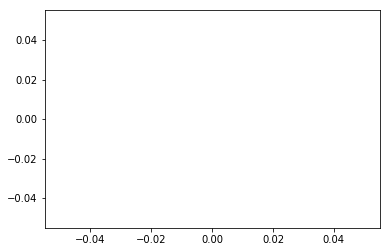

In [15]:

xvals = x.unique()
yodds = []
for xi in xvals:
    y = filter_df["Population"]
    x = filter_df["Robbery"]

plt.scatter(filter_df["Population"], y)

In [16]:
fit = np.polyfit(x,y,1)

TypeError: expected non-empty vector for x

In [17]:
fit_fn = np.poly1d(fit)

NameError: name 'fit' is not defined

In [30]:
plt.plot(xvals, yodds, 'yo', xvals, fit_fn(xvals), '--k')
plt.xlabel('Continuous x')
plt.ylabel('Odds of y=1')
plt.show()

NameError: name 'xvals' is not defined